# Beijing PM 2.5 Expolration

Machine Learning <br>
Chris Xu <br>
Data Source: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

import:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

In [19]:
#names = ['NO.', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
#df = df.drop()
print(df.head(25))
print(df.shape)
y = np.array(df['cbwd'])

    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0    1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1    2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2    3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3    4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4    5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
5    6  2010      1    1     5    NaN   -19 -10.0  1017.0   NW  16.10   0   0
6    7  2010      1    1     6    NaN   -19  -9.0  1017.0   NW  19.23   0   0
7    8  2010      1    1     7    NaN   -19  -9.0  1017.0   NW  21.02   0   0
8    9  2010      1    1     8    NaN   -19  -9.0  1017.0   NW  24.15   0   0
9   10  2010      1    1     9    NaN   -20  -8.0  1017.0   NW  27.28   0   0
10  11  2010      1    1    10    NaN   -19  -7.0  1017.0   NW  31.30   0   0
11  12  2010      1    1    11    NaN   -18  -5.0  1017.0   NW  

This dataset looks neat but need some preprocessing. For example there are a lot of NaN in pm2.5 which is an important
feature in this dataset.

In [22]:
df['pm2.5'].isnull().sum()
# out of 43824 samples, there are 2067 missing pm2.5 values
df = df.dropna()
print(df.shape)
print(df.head(6))
time_of_day = np.array(df['hour'])
'''
for i in range(df.shape[0]):
    if time_of_day[i] != 12:
        df1 = df.drop([i])
'''
df1 = df[df.hour == 12]
print(df1.head(25))
print(df1.shape)

(41757, 13)
    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0
29  30  2010      1    2     5  109.0    -7  -6.0  1022.0   SE  7.14   3   0
      No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  \
36    37  2010      1    2    12  148.0    -8  -5.0  1026.0   SE   23.69   0   
60    61  2010      1    3    12  107.0   -11  -9.0  1021.0   SE  105.93  17   
84    85  2010      1    4    12   29.0   -21 -11.0  1030.0   NW  117.55   0   
108  109  2010      1    5    12   27.0   -25 -12.0  1034.0   NE   39.35   0   
132  133  2010      1    6    12   28.0   -24 -10

I am interested in a few features: month, temperature, pressure, wind speed and wind directions
and graph out some relations between features, so I may find some relations to train

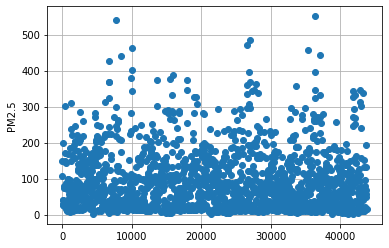

In [23]:
pm25 = np.array(df1['pm2.5'])
pm25_mean = pm25.mean()
x = np.array(df1['No'])
plt.plot(x,pm25, 'o')
plt.ylabel('PM2.5')
plt.grid(True)

winter is more likely to have high pm2.5

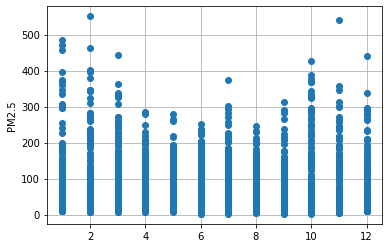

In [24]:
pm25 = np.array(df1['pm2.5'])
x = np.array(df1['month'])
plt.plot(x,pm25, 'o')
plt.ylabel('PM2.5')
plt.grid(True)

the pm2.5 is higher as temperature gets lower

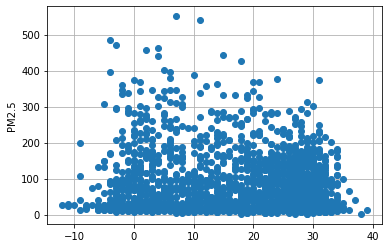

In [25]:
pm25 = np.array(df1['pm2.5'])
x = np.array(df1['TEMP'])
plt.plot(x,pm25, 'o')
plt.ylabel('PM2.5')
plt.grid(True)

the pm2.5 is higher as pressure gets higher

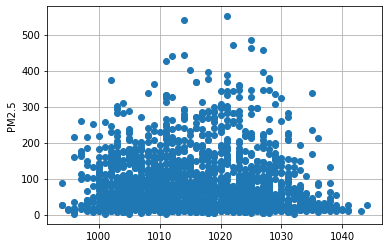

In [26]:
pm25 = np.array(df1['pm2.5'])
x = np.array(df1['PRES'])
plt.plot(x,pm25, 'o')
plt.ylabel('PM2.5')
plt.grid(True)

there is a clear relation between wind speed and pm2.5

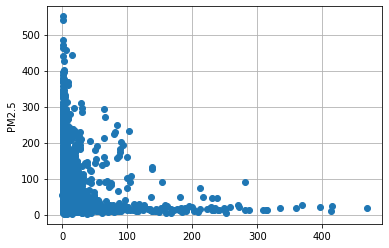

In [27]:
pm25 = np.array(df1['pm2.5'])
x = np.array(df1['Iws'])
plt.plot(x,pm25, 'o')
plt.ylabel('PM2.5')
plt.grid(True)